<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/1911523022_Rafiqah_GaussianNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mengimport Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Mengimport dan Menampilkan Dataset
dataset = pd.read_csv('data_bayi_jawatengah.csv')
dataset

,tahun,wilayah,jumlah_bayi_lahir,kondisi_bayi,jumlah
0,2020,Kabupaten Cilacap,28303,berat_bayi_lahir_rendah,1052
1,2020,Kabupaten Banyumas,26473,berat_bayi_lahir_rendah,1724
2,2020,Kabupaten Purbalingga,14808,berat_bayi_lahir_rendah,767
3,2020,Kabupaten Banjarnegara,15330,berat_bayi_lahir_rendah,1033
4,2020,Kabupaten Kebumen,19548,berat_bayi_lahir_rendah,1003
...,...,...,...,...,...
65,2020,Kota Surakarta,9634,gizi_kurang,243
66,2020,Kota Salatiga,2469,gizi_kurang,81
67,2020,Kota Semarang,23825,gizi_kurang,920
68,2020,Kota Pekalongan,5905,gizi_kurang,989


In [ ]:
#Memanggil fungsi info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tahun              70 non-null     int64 
 1   wilayah            70 non-null     object
 2   jumlah_bayi_lahir  70 non-null     int64 
 3   kondisi_bayi       70 non-null     object
 4   jumlah             70 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ KB


In [ ]:
#Deklarasi Variabel Dependent dan Independent
x = dataset[['jumlah_bayi_lahir', 'jumlah']]
y = dataset['kondisi_bayi']

In [ ]:
#Melakukan Split pada Training set and Test set
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
#Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)

In [ ]:
#Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
#Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[9.20656304e-01, 7.93436956e-02],
       [8.29142358e-01, 1.70857642e-01],
       [8.88054621e-01, 1.11945379e-01],
       [9.12696791e-01, 8.73032091e-02],
       [9.01137951e-01, 9.88620492e-02],
       [6.00029730e-01, 3.99970270e-01],
       [8.33940818e-01, 1.66059182e-01],
       [1.63702292e-37, 1.00000000e+00],
       [7.69700113e-06, 9.99992303e-01],
       [1.06528865e-53, 1.00000000e+00],
       [2.88029811e-10, 1.00000000e+00],
       [9.19807922e-01, 8.01920778e-02],
       [4.43108582e-05, 9.99955689e-01],
       [7.81022348e-01, 2.18977652e-01]])

In [ ]:
#Menampilkan Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[6, 0],
       [3, 5]])

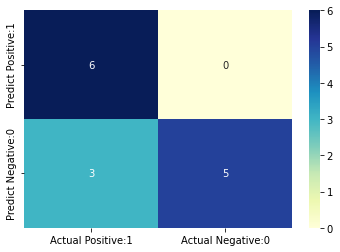

In [ ]:
#Memvisualisasikan confusion matrix 

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.62      0.77         8

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14



In [ ]:
#Melakukan prediksi hasil akurasi 
from sklearn import metrics
y_pred = modelnb.predict(x_test)
print("Hasil Akurasi : ", metrics.accuracy_score(y_test,y_pred))

Hasil Akurasi :  0.7857142857142857
